In [1]:
include("../src/Distribution/poisson.jl")
include("../src/Regression/poisson_regression.jl")
include("../src/Type/method_parameter.jl")
include("../src/Basic/mean.jl")
using Plots
using CSV
using DataFrames
using LinearAlgebra

D1 = 475.2864426185736
D2 = 470.77483279797104
ΔD = 4.51160982060253


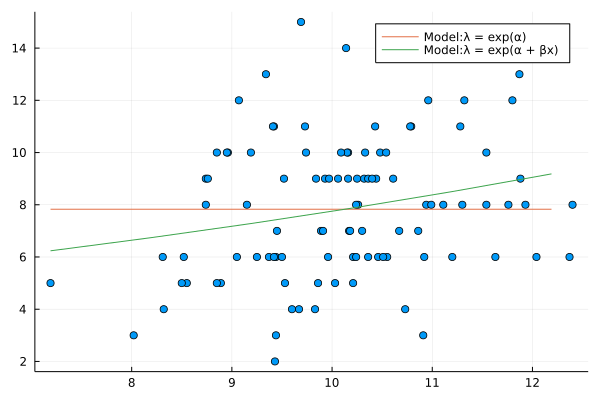

In [2]:
# データ
data = CSV.read("../data/kubobook_2012_csv/data3a.csv", DataFrame)
N = size(data, 1)
X = ones(N, 2)
for i in 1:N; X[i,2] = data.x[i]; end
Y = data.y

# 関数定義
function logLik(w, X, Y)
    logL = 0
    λs = exp.(X * w)
    for i in 1:length(Y)
        logL += log(poisson_dist(λs[i], Y[i]))
    end
    return logL
end
deviance(w,X,Y) = -2 * logLik(w,X,Y)

# ポアソン回帰
# 一定モデル:λ = exp(α)
w1 = log(mean(Y))

# xモデル:λ = exp(α + βx)
w2 = poisson_regression(X, Y, GD(zeros(2), t->0.0001/sqrt(1+0.01t), 1e-4, 40000))

# 逸脱度,残差逸脱度
dev1 = deviance(w1,X[:,1],Y)
println("D1 = $dev1")
dev2 = deviance(w2,X,Y)
println("D2 = $dev2")
ΔD = dev1 - dev2
println("ΔD = $ΔD")

# グラフ描画
scatter(X[:,2], Y, label="")
xrange = (minimum(data.x):maximum(data.x))
plot!(xrange, _ -> exp(w1), label="Model:λ = exp(α)")
plot!(xrange, x -> exp(w2[1] + w2[2]*x), label="Model:λ = exp(α + βx)")

In [3]:
# パラメトリックブートストラップ法
DDevs = zeros(1000)
λ = mean(Y)
for i in 1:length(DDevs)
    randY = map(r -> poisson_inv(λ,r), rand(N))
    _w1 = log(mean(randY))
    _w2 = poisson_regression(X, randY, GD(zeros(2), t->0.0001/sqrt(1+0.01t), 1e-4, 40000))
    DDevs[i] = deviance(_w1,X[:,1],randY) - deviance(_w2,X,randY)
end

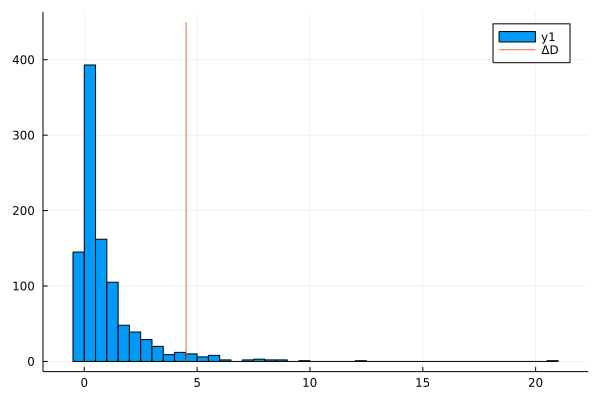

In [4]:
# ヒストグラム
histogram(DDevs)
plot!([ΔD,ΔD], [0,450],label="ΔD")